# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("./data/lfw/*/*"))
dog_files = np.array(glob("./data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 5749 total human images.
There are 399 total dog images.


In [2]:
def list_all_images_in_directory(directory):
    
    import os
    
    path = os.path.abspath(directory)
    
    images = []
    
    # r=root, d=directories, f = files

    for r, d, f in os.walk(path):
        for file in f:
            if '.jpg' in file:
                images.append(os.path.join(r, file))
                
    return images

In [3]:
import os

human_images_dir = '.\data\lfw'
dog_images_dir = '.\data\dog_images'

human_path = os.path.abspath(human_images_dir)
dog_path = os.path.abspath(dog_images_dir)

human_files = list_all_images_in_directory(human_images_dir)
dog_files = list_all_images_in_directory(dog_images_dir)

len(human_files), len(dog_files)

(13233, 8351)

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [4]:
import cv2
import matplotlib.pyplot as plt                        
import os

img = cv2.imread(os.path.abspath(human_files[0]))
cv_rgb = cv2.cvtColor(img, 0)

plt.imshow(cv_rgb)
plt.show()

# plt.imshow(img)
# plt.show()

<Figure size 640x480 with 1 Axes>

Number of faces detected: 1


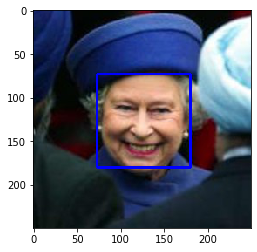

In [18]:
import cv2, random                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector

face_cascade = cv2.CascadeClassifier('./opencv/data/haarcascades_cuda/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[random.randint(0,len(human_files)+1)])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [61]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
Haar Face Detection: Humans:98%, Dogs:17%

In [13]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_detected = 0.0
dog_detected = 0.0

num_files = len(human_files_short)

for i in range(0, num_files):
    human_path = human_files_short[i]
    dog_path = dog_files_short[i]
    
    if face_detector(human_path) == True:
        human_detected += 1
    if face_detector(dog_path) == True:
        dog_detected += 1
        
print('Haar Face Detection')
print('The percentage of the detected face - Humans:{0:.0%}'.format(human_detected / num_files))
print('The percentage of the detected face - Dogs:{0:.0%}'.format(dog_detected / num_files))


Haar Face Detection
The percentage of the detected face - Humans:98%
The percentage of the detected face - Dogs:24%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

face_cascade = cv2.CascadeClassifier('./opencv/data/haarcascades_cuda/haarcascade_frontalface_alt2.xml')

In [15]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_detected = 0.0
dog_detected = 0.0

num_files = len(human_files_short)

for i in range(0, num_files):
    human_path = human_files_short[i]
    dog_path = dog_files_short[i]
    
    if face_detector(human_path) == True:
        human_detected += 1
    if face_detector(dog_path) == True:
        dog_detected += 1
        
print('Haar Face Detection alt_2')
print('The percentage of the detected face - Humans:{0:.0%}'.format(human_detected / num_files))
print('The percentage of the detected face - Dogs:{0:.0%}'.format(dog_detected / num_files))


Haar Face Detection alt_2
The percentage of the detected face - Humans:98%
The percentage of the detected face - Dogs:37%


In [68]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

face_cascade = cv2.CascadeClassifier('./opencv/data/haarcascades_cuda/haarcascade_frontalface_alt_tree.xml')

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_detected = 0.0
dog_detected = 0.0

num_files = len(human_files_short)

for i in range(0, num_files):
    human_path = human_files_short[i]
    dog_path = dog_files_short[i]
    
    if face_detector(human_path) == True:
        human_detected += 1
    if face_detector(dog_path) == True:
        dog_detected += 1
        
print('Haar Face Detection alt_tree')
print('The percentage of the detected face - Humans:{0:.0%}'.format(human_detected / num_files))
print('The percentage of the detected face - Dogs:{0:.0%}'.format(dog_detected / num_files))


Haar Face Detection alt_tree
The percentage of the detected face - Humans:87%
The percentage of the detected face - Dogs:12%


In [67]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

face_cascade = cv2.CascadeClassifier('./opencv/data/haarcascades_cuda/haarcascade_frontalface_default.xml')

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_detected = 0.0
dog_detected = 0.0

num_files = len(human_files_short)

for i in range(0, num_files):
    human_path = human_files_short[i]
    dog_path = dog_files_short[i]
    
    if face_detector(human_path) == True:
        human_detected += 1
    if face_detector(dog_path) == True:
        dog_detected += 1
        
print('Haar Face Detection default')
print('The percentage of the detected face - Humans:{0:.0%}'.format(human_detected / num_files))
print('The percentage of the detected face - Dogs:{0:.0%}'.format(dog_detected / num_files))


Haar Face Detection default
The percentage of the detected face - Humans:100%
The percentage of the detected face - Dogs:62%


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [64]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [59]:
import torchvision.transforms as transforms
from torch.autograd import Variable

from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    img = Image.open(img_path)
    
    # VGG-16 takes 224x224 images as input, resize!
    # Convert PIL image into Tersor
    # Normailize input images to make its elements from 0 to 1
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])
    
    # Apply the transformation above
    img = data_transform(img)
    
    # PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
    # Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis. 
    # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    img = img.unsqueeze(0)
    
    # Now that we have preprocessed our img, we need to convert it into a 
    # Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    # wrapper around a PyTorch Tensor.
    img = Variable(img)
    
    if use_cuda:
         img = img.cuda()
    
    # Returns a Tensor of shape (batch, num class labels)
    prediction = VGG16(img)
    
    if use_cuda:
         prediction = prediction.cpu()
    
    prediction = prediction.data.numpy().argmax()

    ## Return the *index* of the predicted class for that image
    return prediction

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [60]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    class_index = VGG16_predict(img_path)
    
    if class_index >= 151 and class_index <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
VGG-16 Prediction: The percentage of the detected dogs in human files: 2%, and in dog files: 96%

In [21]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_detected = 0.0
dog_detected = 0.0

num_files = len(human_files_short)

for i in range(0, num_files):
    human_path = human_files_short[i]
    dog_path = dog_files_short[i]
    
    if dog_detector(human_path) == True:
        human_detected += 1
    if dog_detector(dog_path) == True:
        dog_detected += 1

print('VGG-16 Prediction')
print('The percentage of the detected dog - Humans: {0:.0%}'.format(human_detected / num_files))
print('The percentage of the detected dog - Dogs: {0:.0%}'.format(dog_detected / num_files))

VGG-16 Prediction
The percentage of the detected dog - Humans: 1%
The percentage of the detected dog - Dogs: 93%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [22]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [6]:
import torchvision.transforms as transforms



# Declare the transforms for train, valid and test sets.
# Imitate the VGG-16 model.
# Resize images because the input size of VGG-16 is 224x224
# Convert to Tensor
# Normalize images because the values of images should be loaded between [0 - 1]
transforms = {
    
    # Use RandomHorizontalFlip() to augement data in the train transformation
    'train' : transforms.Compose([transforms.Resize(256),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'valid' : transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'test' : transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
}

In [7]:
from torchvision import datasets
from torchvision import utils
import torch, os

# Number of subprocesses, if it's 0, it uses the main process.
num_workers = 0
# How many samples will be loaded for one batch?
batch_size = 20

data_dir = os.path.abspath('.\data\dog_images\dogimages')


# Create image datasets (train, valid, test)
image_datasets = {x: datasets.ImageFolder(data_dir + '\\' + x, transforms[x])
                 for x in ['train', 'valid', 'test']}

# Create data loaders (train, valid, test)
data_loaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers)
               for x in ['train', 'valid', 'test']}

# Decrease batch size because of the out of memory in the GPU Instance
test_loader = torch.utils.data.DataLoader(image_datasets['test'], shuffle=True,
                                         batch_size=15)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
1. I resized the images to (244, 244) using transforms.resize() to reduces size for faster processing and lower memroy usage

2. Yes, dataset is augmented using RandomHorizontalFlip() transformation. Rotation and translation for a small size image might introduce some artifacts at egdes or corners that the network might learn!

In [8]:
# Check the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}

print('Number of records of training dataset: {}'.format(dataset_sizes['train']))
print('Number of records of validation dataset: {}'.format(dataset_sizes['valid']))
print('Number of records of test dataset: {}'.format(dataset_sizes['test']))
print('Number of records of all iamges in dataset: {}'.format(sum(dataset_sizes.values())))

Number of records of training dataset: 6680
Number of records of validation dataset: 835
Number of records of test dataset: 836
Number of records of all iamges in dataset: 8351


In [9]:
# Get the all the breed labels
class_names = image_datasets['train'].classes
print(class_names)

['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Cane_corso', '045.Cardigan_welsh_

In [10]:
# Get the number of classes
n_classes = len(class_names)
print('Number of classes: {}'.format(n_classes))

Number of classes: 133


In [10]:
# Display one record (input, label)
# The image should be normalized, the label is a integer value between 0 - 132
data_loaders['train'].dataset[6679]

(tensor([[[ 0.0227,  0.0227,  0.0227,  ...,  0.2111,  0.1939,  0.1768],
          [ 0.0227,  0.0227,  0.0227,  ...,  0.2111,  0.1939,  0.1768],
          [ 0.0056,  0.0056,  0.0227,  ...,  0.2282,  0.2111,  0.1939],
          ...,
          [-1.1932, -1.1932, -1.1932,  ..., -0.0629, -0.2171, -0.3027],
          [-1.3302, -1.3302, -1.3302,  ..., -0.0972, -0.2342, -0.3027],
          [-1.4158, -1.4158, -1.4158,  ..., -0.1143, -0.2342, -0.3027]],
 
         [[ 0.2577,  0.2577,  0.2577,  ...,  0.4678,  0.4678,  0.4678],
          [ 0.2577,  0.2577,  0.2577,  ...,  0.4853,  0.4853,  0.4678],
          [ 0.2577,  0.2577,  0.2752,  ...,  0.5203,  0.5028,  0.4853],
          ...,
          [-1.5105, -1.4755, -1.4405,  ...,  0.3102,  0.1527,  0.0476],
          [-1.6681, -1.6331, -1.5980,  ...,  0.2577,  0.1352,  0.0476],
          [-1.7556, -1.7381, -1.6856,  ...,  0.2227,  0.1176,  0.0476]],
 
         [[ 0.3393,  0.3568,  0.4091,  ...,  0.5659,  0.5834,  0.6008],
          [ 0.3393,  0.3568,

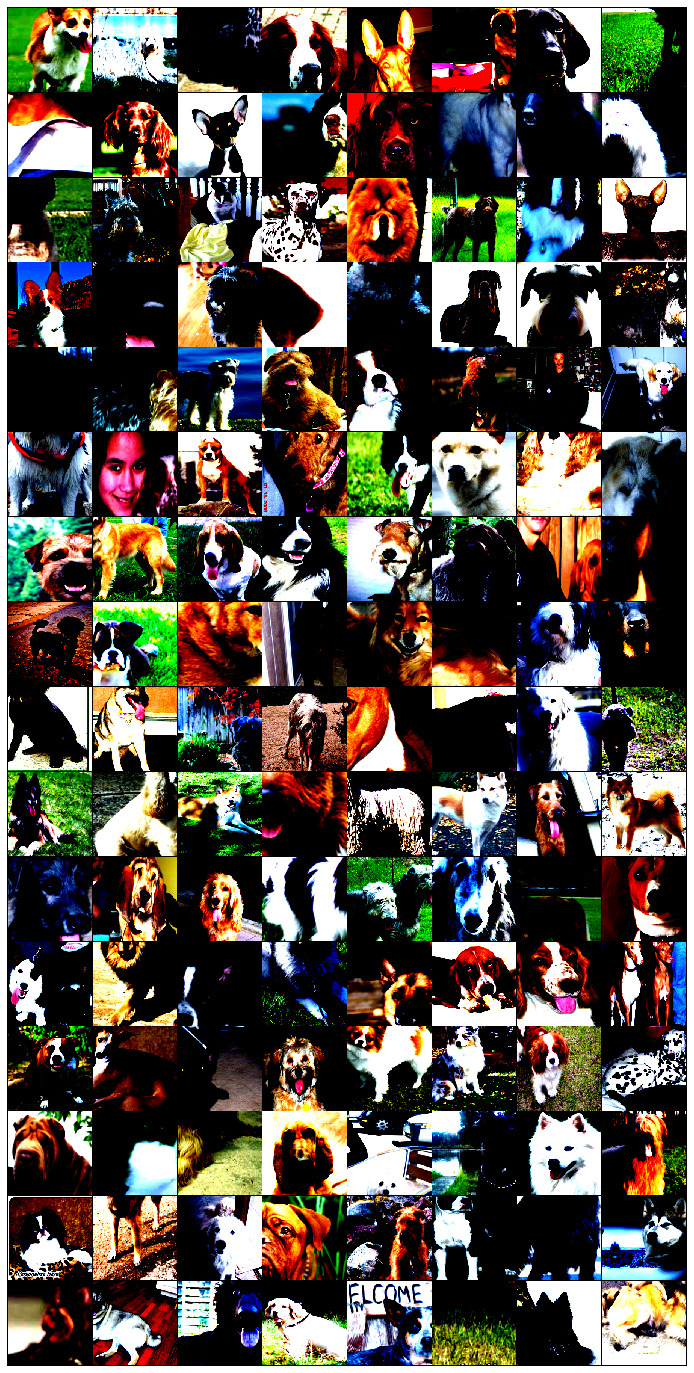

In [16]:
def visualize_sample_images(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    
    fig = plt.figure(figsize=(50, 25))
    plt.axis('off')
    plt.imshow(inp)
    plt.pause(0.001)
    
# Get a batch of training data.    
inputs, classes = next(iter(data_loaders['train']))

# Convert the batch to a grid.
grid = utils.make_grid(inputs)

# Display!
visualize_sample_images(grid)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
torch.backends.cuda.cufft_plan_cache.max_size

4096

In [12]:
torch.backends.cuda.cufft_plan_cache.clear()

In [13]:
use_cuda = torch.cuda.is_available()

In [14]:
torch.cuda.init()

In [15]:
torch.cuda.reset_max_memory_allocated()

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, n_classes) 
        
        # drop-out
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 7*7*128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        ## Define forward behavior
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ both of the first 2 convlutional layers has kernel_size of 3 with stride 2, this will halve the size of input images. Afterwards, maxpooling with stride 2 is placed and this will lead to another halving the size.

(conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

activation: relu

(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

activation: relu

(conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

activation: relu

(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

The 3rd conv layers consists of kernel_size of 3 with stride 1, the size is unchanged. After final maxpooling with stride 2, the total output image size is downsized by factor of 32 and the depth will be 128. A dropout of 0.3 is applied for overfitting prevention.

(conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(dropout): Dropout(p=0.3)

(fc1): Linear(in_features=6272, out_features=500, bias=True)

(dropout): Dropout(p=0.3)

(fc2): Linear(in_features=500, out_features=133, bias=True)

Fully-connected layer is placed and then, 2nd fully-connected layer to produce final output_size which predicts classes of breeds.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [93]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch =  optim.SGD(model_scratch.parameters(), lr=0.03, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [23]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch {}, Batch {} loss: {:.6f}'.format(
                  epoch,
                  batch_idx + 1, 
                  train_loss
                  ))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


In [17]:
#free gpu cache
if use_cuda:
    torch.cuda.empty_cache()
    torch.backends.cuda.cufft_plan_cache.clear()

In [96]:
loaders_scratch = data_loaders

n_epochs = 25

    
# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 1 loss: 4.888648
Epoch 1, Batch 33 loss: 4.883671
Epoch: 1 	Training Loss: 4.879806 	Validation Loss: 4.847412
Validation loss decreased (inf --> 4.847412).  Saving model ...
Epoch 2, Batch 1 loss: 4.860980
Epoch 2, Batch 33 loss: 4.813448
Epoch: 2 	Training Loss: 4.800905 	Validation Loss: 4.694414
Validation loss decreased (4.847412 --> 4.694414).  Saving model ...
Epoch 3, Batch 1 loss: 4.746496
Epoch 3, Batch 33 loss: 4.687100
Epoch: 3 	Training Loss: 4.669871 	Validation Loss: 4.501729
Validation loss decreased (4.694414 --> 4.501729).  Saving model ...
Epoch 4, Batch 1 loss: 4.629978
Epoch 4, Batch 33 loss: 4.586697
Epoch: 4 	Training Loss: 4.585443 	Validation Loss: 4.397918
Validation loss decreased (4.501729 --> 4.397918).  Saving model ...
Epoch 5, Batch 1 loss: 4.536512
Epoch 5, Batch 33 loss: 4.532869
Epoch: 5 	Training Loss: 4.529831 	Validation Loss: 4.320515
Validation loss decreased (4.397918 --> 4.320515).  Saving model ...
Epoch 6, Batch 1 loss: 4.48938

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [98]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.629331


Test Accuracy: 14% (119/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
loaders_transfer = data_loaders

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# Load VGG-16 model
model_transfer = models.vgg16(pretrained=True)

# Freeze the pre-trained weights
for param in model_transfer.features.parameters():
    param.required_grad = False
    
# Get the input of the last layer of VGG-16
n_inputs = model_transfer.classifier[6].in_features

# Create a new layer(n_inputs -> 133)
# The new layer's requires_grad will be automatically True.
last_layer = nn.Linear(n_inputs, n_classes)

# Change the last layer to the new layer.
model_transfer.classifier[6] = last_layer

# Print the model.
print(model_transfer)


if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I chose to use VGG-16 as a transfer model due to its good performance on Image Classification. It has been already trained on millons of images and can extract feature from a relatively low resolution input (244*244 pixels)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

In [30]:
# train the model

n_epochs = 10
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch 1, Batch 1 loss: 1.612643
Epoch 1, Batch 101 loss: 1.519558
Epoch 1, Batch 201 loss: 1.460642
Epoch 1, Batch 301 loss: 1.449350
Epoch: 1 	Training Loss: 1.445318 	Validation Loss: 0.680448
Validation loss decreased (inf --> 0.680448).  Saving model ...
Epoch 2, Batch 1 loss: 1.686967
Epoch 2, Batch 101 loss: 1.327822
Epoch 2, Batch 201 loss: 1.334237
Epoch 2, Batch 301 loss: 1.330485
Epoch: 2 	Training Loss: 1.321882 	Validation Loss: 0.617098
Validation loss decreased (0.680448 --> 0.617098).  Saving model ...
Epoch 3, Batch 1 loss: 1.405385
Epoch 3, Batch 101 loss: 1.174705
Epoch 3, Batch 201 loss: 1.219488
Epoch 3, Batch 301 loss: 1.209531
Epoch: 3 	Training Loss: 1.201100 	Validation Loss: 0.594219
Validation loss decreased (0.617098 --> 0.594219).  Saving model ...
Epoch 4, Batch 1 loss: 1.041518
Epoch 4, Batch 101 loss: 1.191736
Epoch 4, Batch 201 loss: 1.154543
Epoch 4, Batch 301 loss: 1.140392
Epoch: 4 	Training Loss: 1.130854 	Validation Loss: 0.563663
Validation loss de

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.556298


Test Accuracy: 84% (710/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]


In [36]:
loaders_transfer['train'].dataset.classes[:10]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog']

In [37]:
class_names[:10]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog']

In [46]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in  image_datasets['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = image_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = model_transfer(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]

In [47]:
def image_to_tensor(img_path):
    '''
    As per Pytorch documentations: All pre-trained models expect input images normalized in the same way, 
    i.e. mini-batches of 3-channel RGB images
    of shape (3 x H x W), where H and W are expected to be at least 224. 
    The images have to be loaded in to a range of [0, 1] and 
    then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 
    You can use the following transform to normalize:
    '''
    img = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=224),
                                          transforms.CenterCrop((224,224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    image_tensor = transformations(img)[:3,:,:].unsqueeze(0)
    return image_tensor


# helper function for un-normalizing an image  - from STYLE TRANSFER exercise
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

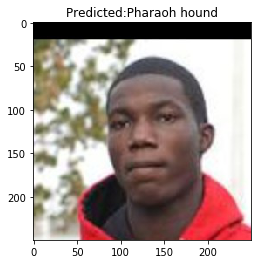

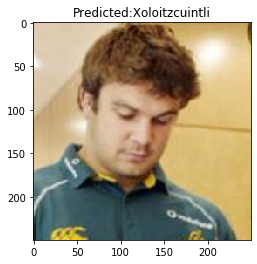

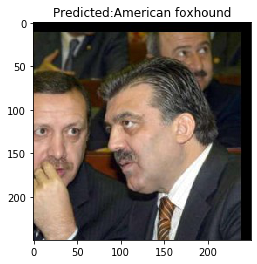

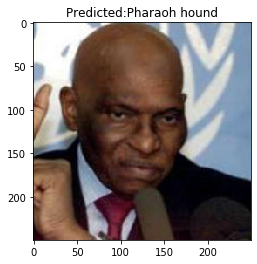

In [48]:
import random

# Try out the function
for image in random.sample(list(human_files_short), 4): 
    predicted_breed = predict_breed_transfer(image)
    display_image(image, title=f"Predicted:{predicted_breed}")

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [75]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
     # check if image has juman faces:
    if (face_detector(img_path)):
        print("Hello Human!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=f"Predicted:{predicted_breed}")
        
        print("You look like a ...")
        print(predicted_breed.upper())
    # check if image has dogs:
    elif dog_detector(img_path):
        print("Hello Doggie!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=f"Predicted:{predicted_breed}")
        
        print("Your breed is most likley ...")
        print(predicted_breed.upper())
    else:
        print("Oh, we're sorry! We couldn't detect any dog or human face in the image.")
        display_image(img_path, title="...")
        print("Try another!")
    print("\n")

Hello Human!


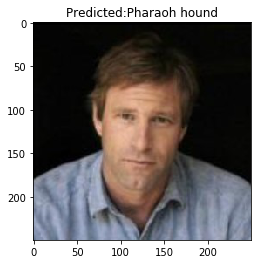

You look like a ...
PHARAOH HOUND


Hello Human!


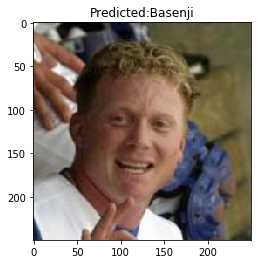

You look like a ...
BASENJI


Oh, we're sorry! We couldn't detect any dog or human face in the image.


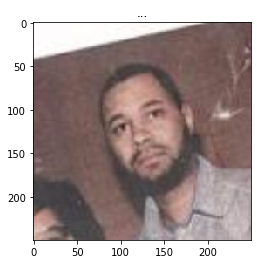

Try another!


Hello Human!


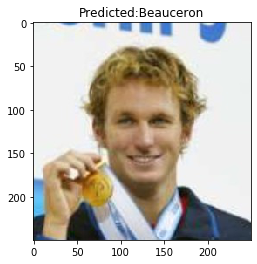

You look like a ...
BEAUCERON


Hello Human!


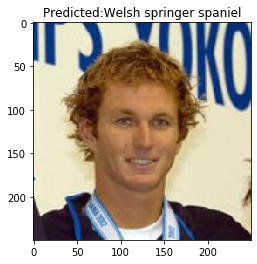

You look like a ...
WELSH SPRINGER SPANIEL


Hello Doggie!


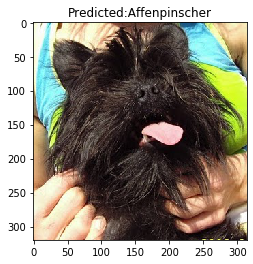

Your breed is most likley ...
AFFENPINSCHER


Hello Doggie!


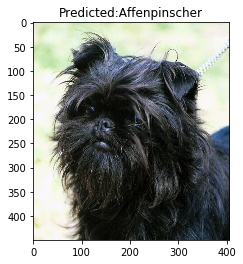

Your breed is most likley ...
AFFENPINSCHER


Hello Doggie!


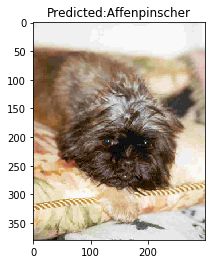

Your breed is most likley ...
AFFENPINSCHER


Hello Doggie!


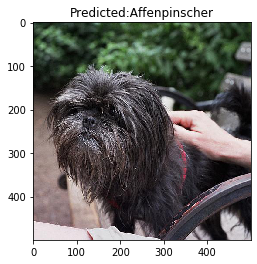

Your breed is most likley ...
AFFENPINSCHER


Hello Doggie!


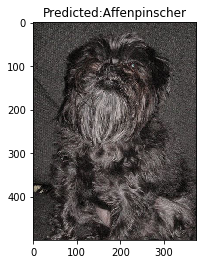

Your breed is most likley ...
AFFENPINSCHER




In [89]:
for file in np.hstack((human_files[:5], dog_files[:5])):
    run_app(file)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Answer: I'm very sattisfied with the performance of my transfered model from VGG-16, especialy that its performance eclipces the scrach model. we could get a similar, if not better, performance with only two epochs! This was due to the increment of batch size, albeit is was difficult to transfer it to the GPU. adding an extra layer with dropout might improve the algorithm.

Regarding the face detectors, it is evident that there is room for improvment. Akin aforementioned improvements, we might use transfer learning to train an MLP to classifiy the detected face as human or dog 

Hello Human!


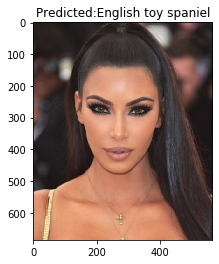

You look like a ...
ENGLISH TOY SPANIEL


Hello Human!


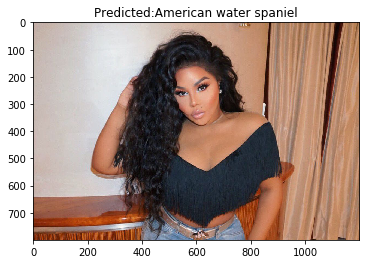

You look like a ...
AMERICAN WATER SPANIEL


Hello Human!


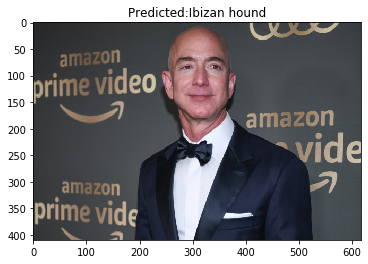

You look like a ...
IBIZAN HOUND


Hello Doggie!


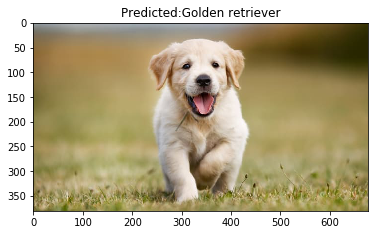

Your breed is most likley ...
GOLDEN RETRIEVER


Hello Doggie!


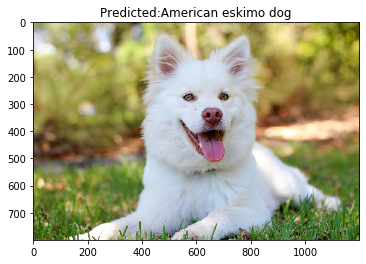

Your breed is most likley ...
AMERICAN ESKIMO DOG


Hello Doggie!


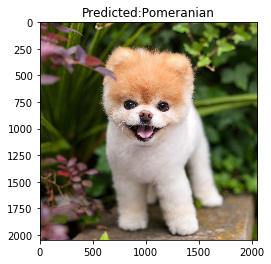

Your breed is most likley ...
POMERANIAN




In [97]:
import urllib.request
import cv2



human_images_urls = ['https://qph.fs.quoracdn.net/main-qimg-6288e11e0b81889adfe5a4fc38ab7e01', 'https://cdn.vox-cdn.com/thumbor/otE0bcZmV31JrgdT48xd42JBIEU=/0x0:1085x1080/1200x800/filters:focal(315x160:487x332)/cdn.vox-cdn.com/uploads/chorus_image/image/65072478/otmgjd6nchskdrqs2md8.9.jpg', 'https://thenypost.files.wordpress.com/2019/04/190412-jeff-bezos.jpg?quality=90&strip=all&w=618&h=410&crop=1' ]
dog_images_urls = ['https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg?v=1561667497&w=678&h=381', 'https://www.nedlands.wa.gov.au/sites/default/files/dog1_0.jpeg', 'https://fortunedotcom.files.wordpress.com/2019/01/boo.jpg']

## suggested code, below
for url in np.hstack((human_images_urls[:3], dog_images_urls[:3])):
    urllib.request.urlretrieve(url, "test.jpg")
    run_app("test.jpg")